In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../')

from util.datetime_utils import calculate_hour_sin_cos

/tmp/ipykernel_157669/3200303222.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('../data/processed/ProcessedTweets.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  int64  
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negative_reason               14640 non-null  int64  
 4   negative_reason_confidence    14640 non-null  float64
 5   airline                       14640 non-null  int64  
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                14640 non-null  object 
 11  user_timezone                 14640 non-null  object 
 12  fractional_hour               14640 non-null  float64
 13  h

,tweet_id,airline_sentiment,airline_sentiment_confidence,negative_reason,negative_reason_confidence,airline,retweet_count,fractional_hour,hour_sin,hour_cos
count,1.464000e+04,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000
mean,5.692184e+17,1.415232,0.900169,2.675751,0.458755,2.785178,0.082650,12.817539,-0.066026,-0.316231
std,7.791112e+14,0.816223,0.162830,2.651616,0.401057,1.557632,0.745778,5.302708,0.719609,0.614705
min,5.675883e+17,0.000000,0.335000,0.000000,0.000000,0.000000,0.000000,0.002500,-1.000000,-1.000000
25%,5.685592e+17,1.000000,0.692300,0.000000,0.000000,1.000000,0.000000,8.850833,-0.784686,-0.867232
50%,5.694779e+17,2.000000,1.000000,3.000000,0.624600,3.000000,0.000000,12.679861,-0.147162,-0.500787
75%,5.698905e+17,2.000000,1.000000,4.000000,0.703300,4.000000,0.000000,17.061528,0.666004,0.162501
max,5.703106e+17,2.000000,1.000000,10.000000,1.000000,5.000000,44.000000,23.985556,1.000000,1.000000


In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negative_reason,negative_reason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,fractional_hour,hour_sin,hour_cos
0,570306133677760513,0,1.0000,0,0.0000,0,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,Unknown,Eastern Time (US & Canada),11.597778,0.105107,-0.994461
1,570301130888122368,1,0.3486,0,0.0000,0,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,Unknown,Pacific Time (US & Canada),11.266389,0.190880,-0.981613
2,570301083672813571,0,0.6837,0,0.0000,0,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada),11.263333,0.191666,-0.981460
3,570301031407624196,2,1.0000,1,0.7033,0,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,Unknown,Pacific Time (US & Canada),11.260000,0.192522,-0.981293
4,570300817074462722,2,1.0000,2,1.0000,0,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,Unknown,Pacific Time (US & Canada),11.245833,0.196160,-0.980572


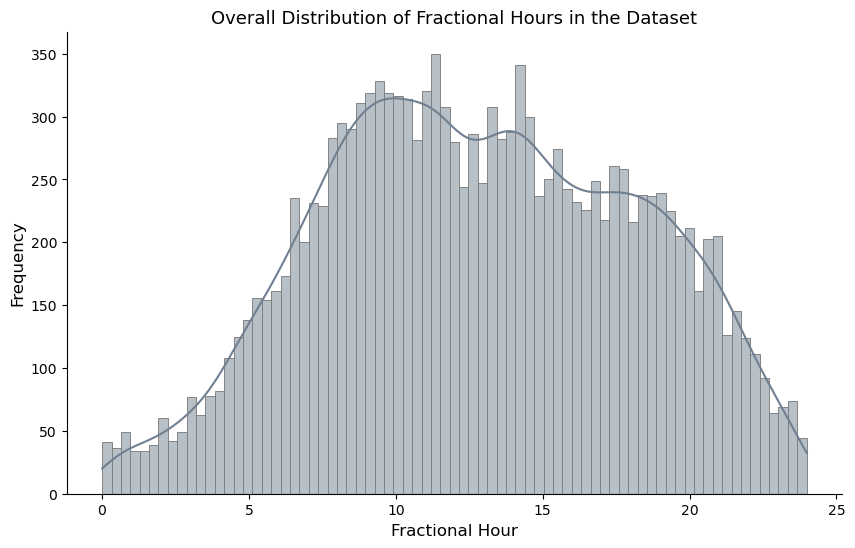

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='fractional_hour', kde=True, color='slategray', edgecolor='gray', bins=75)
plt.title('Overall Distribution of Fractional Hours in the Dataset', fontsize=13)
plt.xlabel('Fractional Hour', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

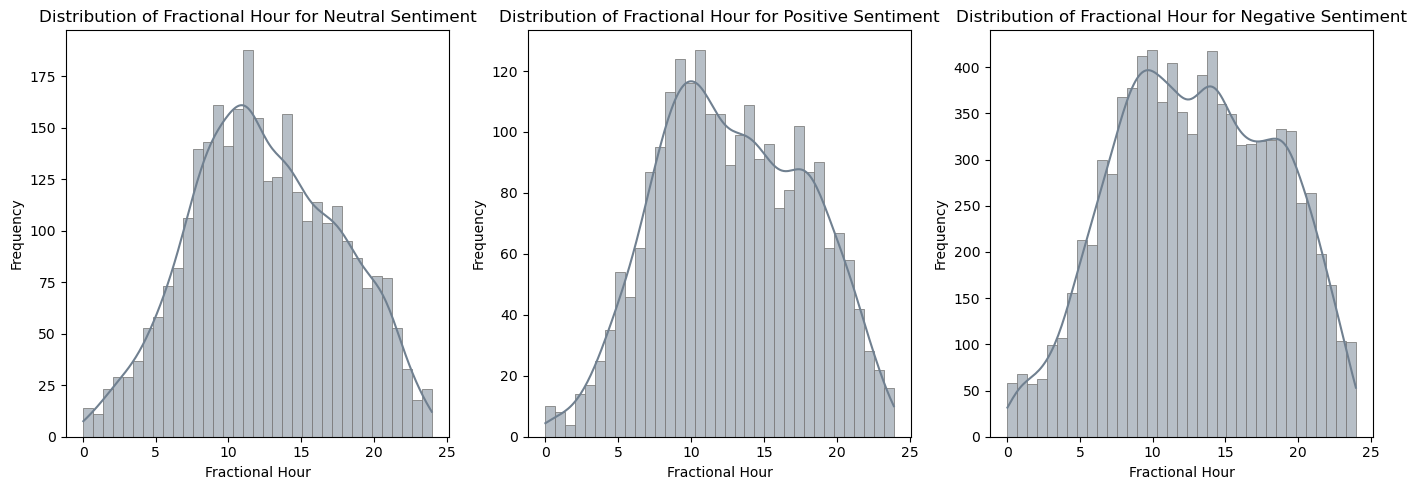

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
axes = axes.flatten()
sentiments = ['neutral', 'positive', 'negative']

for i, sentiment in enumerate(sentiments):
    sns.histplot(df[df['airline_sentiment'] == i], x='fractional_hour', kde=True, ax=axes[i], color='slategray', edgecolor='gray', bins=35)
    axes[i].set_title(f'Distribution of Fractional Hour for {sentiment.capitalize()} Sentiment')
    axes[i].set_xlabel('Fractional Hour')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

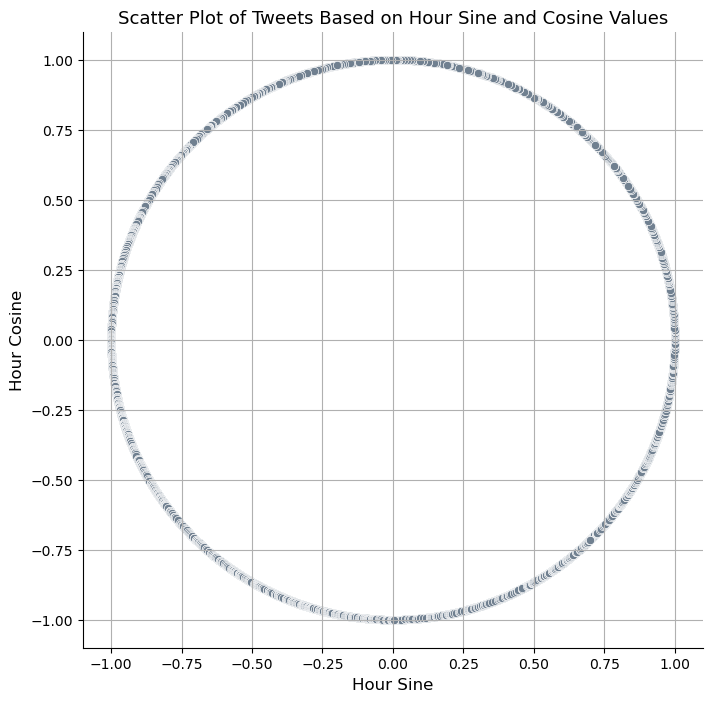

In [7]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='hour_sin', y='hour_cos', data=df, color='slategray')
plt.title('Scatter Plot of Tweets Based on Hour Sine and Cosine Values', fontsize=13)
plt.xlabel('Hour Sine', fontsize=12)
plt.ylabel('Hour Cosine', fontsize=12)
plt.grid(True)
sns.despine()
plt.show()

Not very informative, but at least it is verifies that the sine and cosine transformations are working as intended. Let's adjust the size and transparency to get an idea of the density of tweets.

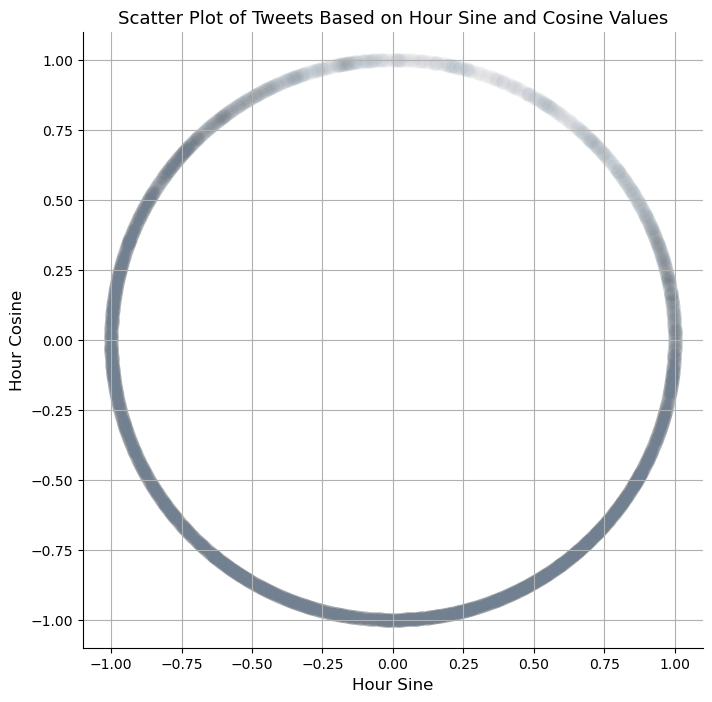

In [8]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='hour_sin', y='hour_cos', data=df, color='slategray', s=110, alpha=0.01)  # Adjust size and transparency
plt.title('Scatter Plot of Tweets Based on Hour Sine and Cosine Values', fontsize=13)
plt.xlabel('Hour Sine', fontsize=12)
plt.ylabel('Hour Cosine', fontsize=12)
plt.grid(True)
sns.despine()
plt.show()


Based on this and the histogram above, the high density on the bottom left corner should be close to midday. 

In [9]:
# tuple (sin, cos)

calculate_hour_sin_cos(12)

(1.2246467991473532e-16, -1.0)

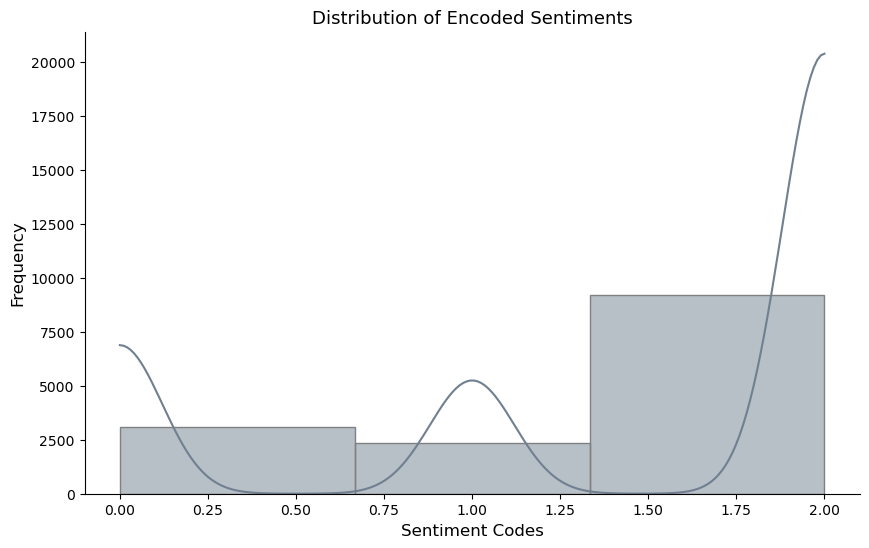

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='airline_sentiment', kde=True, color='slategray', edgecolor='gray', bins=3)
plt.title('Distribution of Encoded Sentiments', fontsize=13)
plt.xlabel('Sentiment Codes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()

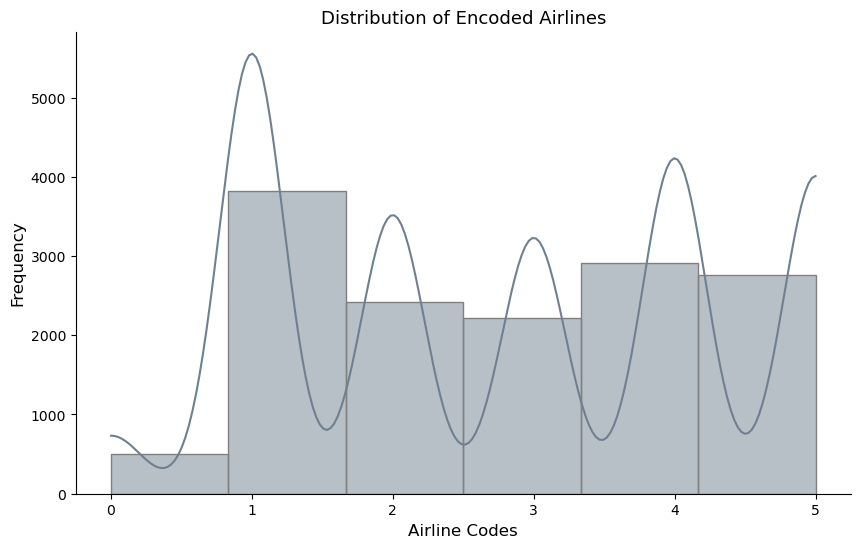

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='airline', kde=True, color='slategray', edgecolor='gray', bins=6)
plt.title('Distribution of Encoded Airlines', fontsize=13)
plt.xlabel('Airline Codes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
sns.despine()
plt.show()